In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import SMOTE
import itertools
import sklearn

import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta
import warnings

In [5]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("credit_record.csv", encoding = 'utf-8') 

In [6]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [7]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
begin_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month.head()

,MONTHS_BALANCE
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59


In [9]:
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month1'}) 
begin_month.head()

,begin_month1
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59


In [10]:
new_data=pd.merge(data,begin_month,how="left",on="ID")

In [11]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26.0


In [12]:
begin_month.head(100)

,begin_month1
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5001837,-57
5001838,-38
5001839,-15


In [13]:
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes'

In [14]:
record.head(170)

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None
...,...,...,...,...
165,5001718,-23,0,None
166,5001718,-24,0,None
167,5001718,-25,0,None
168,5001718,-26,0,None


In [15]:
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes'
record['dep_value'][record['STATUS'] =='4']='Yes'
record['dep_value'][record['STATUS'] =='5']='Yes'
record.head()

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [16]:
cpunt=record.groupby('ID').count()

In [17]:
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]

In [18]:
cpunt

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


In [19]:
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')

In [20]:
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month1,dep_value
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,-11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,-9.0,Yes


In [21]:
#new_data['target']=new_data['dep_value']

In [22]:
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month1,dep_value
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,-11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,-9.0,Yes


In [23]:
#new_data.loc[new_data['target']=='Yes','target']=1
#new_data.loc[new_data['target']=='No','target']=0

In [24]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

In [25]:
new_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'begin_month1',
       'dep_value'],
      dtype='object')

In [26]:
new_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Realty',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                         'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                         'OCCUPATION_TYPE':'occyp'
                        },inplace=True)

In [27]:
new_data.columns

Index(['ID', 'Gender', 'Car', 'Realty', 'ChldNo', 'inc', 'inctp', 'edutp',
       'famtp', 'houtp', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'wkphone', 'phone', 'email', 'occyp', 'famsize', 'begin_month1',
       'dep_value'],
      dtype='object')

In [28]:
new_data['occyp'].fillna('Other',inplace=True)
new_data.dropna()

,ID,Gender,Car,Realty,ChldNo,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month1,dep_value
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2,-15.0,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2,-14.0,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29.0,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4.0,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,-11.0,Yes
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-23.0,Yes
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,-32.0,Yes
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,-9.0,Yes


In [29]:
new_data = new_data.mask(new_data == 'NULL').dropna()

In [30]:
# Gender
new_data['Gender'] = new_data['Gender'].replace(['F','M'],[0,1])
print(new_data['Gender'].value_counts())

0    24430
1    12027
Name: Gender, dtype: int64


In [31]:
# having car or not
new_data['Car'] = new_data['Car'].replace(['N','Y'],[0,1])
print(new_data['Car'].value_counts())

0    22614
1    13843
Name: Car, dtype: int64


In [32]:
# having house or not
new_data['Realty'] = new_data['Realty'].replace(['N','Y'],[0,1])
print(new_data['Realty'].value_counts())

1    24506
0    11951
Name: Realty, dtype: int64


In [33]:
# having phone or not
new_data['phone']=new_data['phone'].astype(str)
print(new_data['phone'].value_counts(normalize=True,sort=False))
new_data.drop(new_data[new_data['phone'] == 'nan' ].index, inplace=True)
print(new_data['phone'].value_counts())

0    0.705187
1    0.294813
Name: phone, dtype: float64
0    25709
1    10748
Name: phone, dtype: int64


In [34]:
# having an email or not
print(new_data['email'].value_counts(normalize=True,sort=False))
new_data['email']=new_data['email'].astype(str)
print(new_data['email'].value_counts())

0    0.910278
1    0.089722
Name: email, dtype: float64
0    33186
1     3271
Name: email, dtype: int64


In [35]:
# having work phone or not
new_data['wkphone']=new_data['wkphone'].astype(str)
print(new_data['wkphone'].value_counts(normalize=True,sort=False))
print(new_data['wkphone'].value_counts())

1    0.225526
0    0.774474
Name: wkphone, dtype: float64
0    28235
1     8222
Name: wkphone, dtype: int64


In [36]:
# Continuous variable

In [37]:
# no of child
new_data['child'] = new_data['ChldNo']
new_data.loc[new_data['child'] >= 2,'child']='2More'
print(new_data['child'].value_counts(sort=False))

0        25201
1         7492
2More     3764
Name: child, dtype: int64


In [38]:
new_data['ChldNo_0'] = 0
new_data['ChldNo_1'] = 0
new_data['ChldNo_2plus'] = 0
new_data.loc[new_data['ChldNo'] == 0,'ChldNo_0']= 1
new_data.loc[new_data['ChldNo'] == 1,'ChldNo_1']= 1
new_data.loc[new_data['ChldNo'] >= 2,'ChldNo_2plus']= 1
print(new_data['ChldNo_0'].value_counts(sort=False))
print(new_data['ChldNo_1'].value_counts(sort=False))
print(new_data['ChldNo_2plus'].value_counts(sort=False))
new_data.head()

1    25201
0    11256
Name: ChldNo_0, dtype: int64
0    28965
1     7492
Name: ChldNo_1, dtype: int64
0    32693
1     3764
Name: ChldNo_2plus, dtype: int64


,ID,Gender,Car,Realty,ChldNo,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month1,dep_value,child,ChldNo_0,ChldNo_1,ChldNo_2plus
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2,-15.0,No,0,1,0,0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2,-14.0,No,0,1,0,0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29.0,No,0,1,0,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4.0,No,0,1,0,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26.0,No,0,1,0,0


In [39]:
# annual income
new_data['inc'] = new_data['inc'].astype(object)
new_data['inc'] = new_data['inc']/10000

In [40]:
# calculation of age based on Days_Birth
new_data['Age']=-(new_data['DAYS_BIRTH'])//365

In [41]:
# no of years worked
new_data['worktm']=-(new_data['DAYS_EMPLOYED'])//365

In [42]:
# family size
new_data['famsize'].value_counts(sort=False)

2     19463
1      6987
5       397
3      6421
4      3106
6        58
15        3
7        19
20        1
9         2
Name: famsize, dtype: int64

In [43]:
#new_data['famsize'].fillna(0,inplace=True)
new_data['famsize']=new_data['famsize'].astype(int)
new_data['famsizegp']=new_data['famsize']
new_data['famsizegp']=new_data['famsizegp'].astype(object)
new_data.loc[new_data['famsizegp']>=3,'famsizegp']='3more'
new_data['famsizegp'].value_counts(sort=False)

2        19463
1         6987
3more    10007
Name: famsizegp, dtype: int64

In [44]:
# income type
print(new_data['inctp'].value_counts(sort=False))
#print(new_data['inctp'].value_counts(normalize=True,sort=False))

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: inctp, dtype: int64


In [45]:
new_data['occyp'].fillna('Other',inplace=True)
print(new_data['occyp'].value_counts())

Other                    11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: occyp, dtype: int64


In [46]:
# House type
print(new_data['houtp'].value_counts())

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: houtp, dtype: int64


In [47]:
# Education
new_data.loc[new_data['edutp']=='Academic degree','edutp']='Higher education'
print(new_data['edutp'].value_counts())

Secondary / secondary special    24777
Higher education                  9896
Incomplete higher                 1410
Lower secondary                    374
Name: edutp, dtype: int64


In [48]:
# Marriage Condition
new_data['famtp'].value_counts(sort=False)

Civil marriage           2945
Married                 25048
Single / not married     4829
Separated                2103
Widow                    1532
Name: famtp, dtype: int64

In [49]:
new_data.columns

Index(['ID', 'Gender', 'Car', 'Realty', 'ChldNo', 'inc', 'inctp', 'edutp',
       'famtp', 'houtp', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'wkphone', 'phone', 'email', 'occyp', 'famsize', 'begin_month1',
       'dep_value', 'child', 'ChldNo_0', 'ChldNo_1', 'ChldNo_2plus', 'Age',
       'worktm', 'famsizegp'],
      dtype='object')

In [50]:
lst = {'Working':1,'Commercial associate':2,'Pensioner':3,'State servant':4,'Student':5}
lst1 = {'Secondary / secondary special':1,'Secondary':1 ,'Higher education':2,'Incomplete higher':3,'Lower secondary':4,'Academic degree':5}
lst2 = {'Married':1,'Single / not married':2,'Single':2,'Civil marriage':3,'Separated':4,'Widow':5}
lst3 = {'House / apartment':1,'With parents':2,'Municipal apartment':3,'Rented apartment':4,'Office apartment':5,'Co-op apartment':6}

lst4  ={'Other':0,'Cleaning staff':1,'Cooking staff':2,'Drivers':3,'Laborers':4,'Low-skill Laborers':5,'Security staff':6,'Waiters/barmen staff':7,
       'Accountants':8,'Core staff':9,'HR staff':10,'Medicine staff':11,'Private service staff':12,'Realty agents':13,'Sales staff':14,
       'Secretaries':15,'Managers':16,'High skill tech staff':17,'IT staff':18}

In [51]:
#lets replace it into numerical value
new_data.replace({'inctp':lst},inplace=True)
new_data.replace({'edutp':lst1},inplace=True)
new_data.replace({'famtp':lst2},inplace=True)
new_data.replace({'houtp':lst3},inplace=True)
new_data.replace({'occyp':lst4},inplace=True)

In [52]:
new_data

,ID,Gender,Car,Realty,ChldNo,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month1,dep_value,child,ChldNo_0,ChldNo_1,ChldNo_2plus,Age,worktm,famsizegp
0,5008804,1,1,1,0,42.75,1,2,3,4,-12005,-4542,1,1,0,0,0,2,-15.0,No,0,1,0,0,32,12,2
1,5008805,1,1,1,0,42.75,1,2,3,4,-12005,-4542,1,1,0,0,0,2,-14.0,No,0,1,0,0,32,12,2
2,5008806,1,1,1,0,11.25,1,1,1,1,-21474,-1134,1,0,0,0,6,2,-29.0,No,0,1,0,0,58,3,2
3,5008808,0,0,1,0,27.0,2,1,2,1,-19110,-3051,1,0,1,1,14,1,-4.0,No,0,1,0,0,52,8,1
4,5008809,0,0,1,0,27.0,2,1,2,1,-19110,-3051,1,0,1,1,14,1,-26.0,No,0,1,0,0,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,31.5,1,1,1,1,-17348,-2420,1,0,0,0,16,2,-11.0,Yes,0,1,0,0,47,6,2
36453,5149834,0,0,1,0,15.75,2,2,1,1,-12387,-1325,1,0,1,1,11,2,-23.0,Yes,0,1,0,0,33,3,2
36454,5149838,0,0,1,0,15.75,3,2,1,1,-12387,-1325,1,0,1,1,11,2,-32.0,Yes,0,1,0,0,33,3,2
36455,5150049,0,0,1,0,28.35,1,1,1,1,-17958,-655,1,0,0,0,14,2,-9.0,Yes,0,1,0,0,49,1,2


In [53]:
new_data

,ID,Gender,Car,Realty,ChldNo,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month1,dep_value,child,ChldNo_0,ChldNo_1,ChldNo_2plus,Age,worktm,famsizegp
0,5008804,1,1,1,0,42.75,1,2,3,4,-12005,-4542,1,1,0,0,0,2,-15.0,No,0,1,0,0,32,12,2
1,5008805,1,1,1,0,42.75,1,2,3,4,-12005,-4542,1,1,0,0,0,2,-14.0,No,0,1,0,0,32,12,2
2,5008806,1,1,1,0,11.25,1,1,1,1,-21474,-1134,1,0,0,0,6,2,-29.0,No,0,1,0,0,58,3,2
3,5008808,0,0,1,0,27.0,2,1,2,1,-19110,-3051,1,0,1,1,14,1,-4.0,No,0,1,0,0,52,8,1
4,5008809,0,0,1,0,27.0,2,1,2,1,-19110,-3051,1,0,1,1,14,1,-26.0,No,0,1,0,0,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,31.5,1,1,1,1,-17348,-2420,1,0,0,0,16,2,-11.0,Yes,0,1,0,0,47,6,2
36453,5149834,0,0,1,0,15.75,2,2,1,1,-12387,-1325,1,0,1,1,11,2,-23.0,Yes,0,1,0,0,33,3,2
36454,5149838,0,0,1,0,15.75,3,2,1,1,-12387,-1325,1,0,1,1,11,2,-32.0,Yes,0,1,0,0,33,3,2
36455,5150049,0,0,1,0,28.35,1,1,1,1,-17958,-655,1,0,0,0,14,2,-9.0,Yes,0,1,0,0,49,1,2


In [54]:
new_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month1', 'child', 'FLAG_MOBIL', 'famsizegp', 'ChldNo', 'ID'], axis=1, inplace=True)

In [55]:
new_data

,Gender,Car,Realty,inc,inctp,edutp,famtp,houtp,wkphone,phone,email,occyp,famsize,dep_value,ChldNo_0,ChldNo_1,ChldNo_2plus,Age,worktm
0,1,1,1,42.75,1,2,3,4,1,0,0,0,2,No,1,0,0,32,12
1,1,1,1,42.75,1,2,3,4,1,0,0,0,2,No,1,0,0,32,12
2,1,1,1,11.25,1,1,1,1,0,0,0,6,2,No,1,0,0,58,3
3,0,0,1,27.0,2,1,2,1,0,1,1,14,1,No,1,0,0,52,8
4,0,0,1,27.0,2,1,2,1,0,1,1,14,1,No,1,0,0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,31.5,1,1,1,1,0,0,0,16,2,Yes,1,0,0,47,6
36453,0,0,1,15.75,2,2,1,1,0,1,1,11,2,Yes,1,0,0,33,3
36454,0,0,1,15.75,3,2,1,1,0,1,1,11,2,Yes,1,0,0,33,3
36455,0,0,1,28.35,1,1,1,1,0,0,0,14,2,Yes,1,0,0,49,1


In [56]:
new_data.loc[new_data['dep_value']=='No','dep_value']= 0
new_data.loc[new_data['dep_value']=='Yes','dep_value']= 1

In [57]:
new_data

,Gender,Car,Realty,inc,inctp,edutp,famtp,houtp,wkphone,phone,email,occyp,famsize,dep_value,ChldNo_0,ChldNo_1,ChldNo_2plus,Age,worktm
0,1,1,1,42.75,1,2,3,4,1,0,0,0,2,0,1,0,0,32,12
1,1,1,1,42.75,1,2,3,4,1,0,0,0,2,0,1,0,0,32,12
2,1,1,1,11.25,1,1,1,1,0,0,0,6,2,0,1,0,0,58,3
3,0,0,1,27.0,2,1,2,1,0,1,1,14,1,0,1,0,0,52,8
4,0,0,1,27.0,2,1,2,1,0,1,1,14,1,0,1,0,0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,31.5,1,1,1,1,0,0,0,16,2,1,1,0,0,47,6
36453,0,0,1,15.75,2,2,1,1,0,1,1,11,2,1,1,0,0,33,3
36454,0,0,1,15.75,3,2,1,1,0,1,1,11,2,1,1,0,0,33,3
36455,0,0,1,28.35,1,1,1,1,0,0,0,14,2,1,1,0,0,49,1


In [58]:
new_data.loc[new_data['worktm']<0,'worktm']= 0

In [59]:
new_data['inc'].astype(float)

0        42.75
1        42.75
2        11.25
3        27.00
4        27.00
         ...  
36452    31.50
36453    15.75
36454    15.75
36455    28.35
36456    11.25
Name: inc, Length: 36457, dtype: float64

In [60]:
bins = [0,10,20,30,40,50,60,70,80,90,100,160]
labels = [0,1,2,3,4,5,6,7,8,9,10]
new_data['income_slot'] = pd.cut(new_data['inc'], bins=bins, labels=labels)

In [61]:
bins = [0,30,40,50,60,70]
labels = [0,1,2,3,4]
new_data['Age_slot'] = pd.cut(new_data['Age'], bins=bins, labels=labels)

In [62]:
bins = [-1001,5,10,15,20,25,30,35,40,45]
labels = [0,1,2,3,4,5,6,7,9]
new_data['worktm_slot'] = pd.cut(new_data['worktm'], bins=bins, labels=labels)

In [63]:
new_data

,Gender,Car,Realty,inc,inctp,edutp,famtp,houtp,wkphone,phone,email,occyp,famsize,dep_value,ChldNo_0,ChldNo_1,ChldNo_2plus,Age,worktm,income_slot,Age_slot,worktm_slot
0,1,1,1,42.75,1,2,3,4,1,0,0,0,2,0,1,0,0,32,12,4,1,2
1,1,1,1,42.75,1,2,3,4,1,0,0,0,2,0,1,0,0,32,12,4,1,2
2,1,1,1,11.25,1,1,1,1,0,0,0,6,2,0,1,0,0,58,3,1,3,0
3,0,0,1,27.0,2,1,2,1,0,1,1,14,1,0,1,0,0,52,8,2,3,1
4,0,0,1,27.0,2,1,2,1,0,1,1,14,1,0,1,0,0,52,8,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,31.5,1,1,1,1,0,0,0,16,2,1,1,0,0,47,6,3,2,1
36453,0,0,1,15.75,2,2,1,1,0,1,1,11,2,1,1,0,0,33,3,1,1,0
36454,0,0,1,15.75,3,2,1,1,0,1,1,11,2,1,1,0,0,33,3,1,1,0
36455,0,0,1,28.35,1,1,1,1,0,0,0,14,2,1,1,0,0,49,1,2,2,0


In [64]:
new_data.drop(['inc','Age','worktm'], axis=1, inplace=True)

In [65]:
new_data

,Gender,Car,Realty,inctp,edutp,famtp,houtp,wkphone,phone,email,occyp,famsize,dep_value,ChldNo_0,ChldNo_1,ChldNo_2plus,income_slot,Age_slot,worktm_slot
0,1,1,1,1,2,3,4,1,0,0,0,2,0,1,0,0,4,1,2
1,1,1,1,1,2,3,4,1,0,0,0,2,0,1,0,0,4,1,2
2,1,1,1,1,1,1,1,0,0,0,6,2,0,1,0,0,1,3,0
3,0,0,1,2,1,2,1,0,1,1,14,1,0,1,0,0,2,3,1
4,0,0,1,2,1,2,1,0,1,1,14,1,0,1,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,1,1,1,1,0,0,0,16,2,1,1,0,0,3,2,1
36453,0,0,1,2,2,1,1,0,1,1,11,2,1,1,0,0,1,1,0
36454,0,0,1,3,2,1,1,0,1,1,11,2,1,1,0,0,1,1,0
36455,0,0,1,1,1,1,1,0,0,0,14,2,1,1,0,0,2,2,0


In [66]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Gender        36457 non-null  int64   
 1   Car           36457 non-null  int64   
 2   Realty        36457 non-null  int64   
 3   inctp         36457 non-null  int64   
 4   edutp         36457 non-null  int64   
 5   famtp         36457 non-null  int64   
 6   houtp         36457 non-null  int64   
 7   wkphone       36457 non-null  object  
 8   phone         36457 non-null  object  
 9   email         36457 non-null  object  
 10  occyp         36457 non-null  int64   
 11  famsize       36457 non-null  int32   
 12  dep_value     36457 non-null  object  
 13  ChldNo_0      36457 non-null  int64   
 14  ChldNo_1      36457 non-null  int64   
 15  ChldNo_2plus  36457 non-null  int64   
 16  income_slot   36457 non-null  category
 17  Age_slot      36457 non-null  category
 18  worktm

In [67]:
new_data['dep_value'] = pd.to_numeric(new_data['dep_value'])
new_data['wkphone'] = pd.to_numeric(new_data['wkphone'])
new_data['phone'] = pd.to_numeric(new_data['phone'])
new_data['email'] = pd.to_numeric(new_data['email'])
new_data['income_slot'] = pd.to_numeric(new_data['income_slot'])
new_data['Age_slot'] = pd.to_numeric(new_data['Age_slot'])
new_data['worktm_slot'] = pd.to_numeric(new_data['worktm_slot'])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        36457 non-null  int64
 1   Car           36457 non-null  int64
 2   Realty        36457 non-null  int64
 3   inctp         36457 non-null  int64
 4   edutp         36457 non-null  int64
 5   famtp         36457 non-null  int64
 6   houtp         36457 non-null  int64
 7   wkphone       36457 non-null  int64
 8   phone         36457 non-null  int64
 9   email         36457 non-null  int64
 10  occyp         36457 non-null  int64
 11  famsize       36457 non-null  int32
 12  dep_value     36457 non-null  int64
 13  ChldNo_0      36457 non-null  int64
 14  ChldNo_1      36457 non-null  int64
 15  ChldNo_2plus  36457 non-null  int64
 16  income_slot   36457 non-null  int64
 17  Age_slot      36457 non-null  int64
 18  worktm_slot   36457 non-null  int64
dtypes: int32(1), int64(18)
me

In [68]:
x=new_data.drop('dep_value',axis=1)
y=new_data['dep_value']

In [69]:
import imblearn
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)

In [70]:
x_res,y_res=smk.fit_resample(x,y)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)
x_train.shape,y_train.shape

((57332, 18), (57332,))

## Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

logreg1 = LogisticRegression() 
logreg1.fit(x_train, y_train)

y_test_pred = logreg1.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.6658294963024975


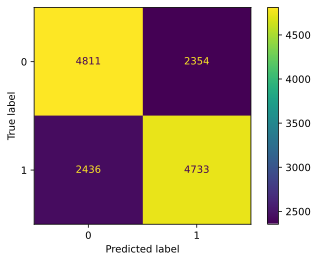

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

In [101]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.6678425285734443
Recall score: 0.6602036546240759
Accuracy score: 0.6658294963024975
F1 score: 0.6640011223344556


In [102]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', logreg1.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-logreg1.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error =  0.33417050369750245
Mean Square Error MSE =  0.33417050369750245
R-Squared =  0.6658294963024975
Adjusted R-Squared =  0.6654093028643868


Text(0, 0.5, 'Precision')

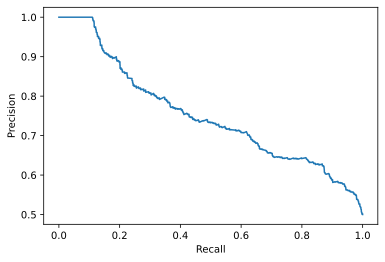

In [103]:
from sklearn.metrics import precision_recall_curve
logreg1.predict_proba(x_test)  # 1 - pihat, pihat
prob_test = logreg1.predict_proba(x_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

## K Nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

y_test_pred = knn.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.9429328868424725


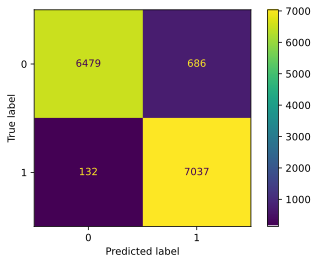

In [105]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_test_pred)
knn_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

In [106]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.9111744140877898
Recall score: 0.9815873901520435
Accuracy score: 0.9429328868424725
F1 score: 0.9450711791565942


In [107]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', knn.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-knn.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error =  0.057067113157527556
Mean Square Error MSE =  0.057067113157527556
R-Squared =  0.9429328868424725
Adjusted R-Squared =  0.9428611293826865


Text(0, 0.5, 'Precision')

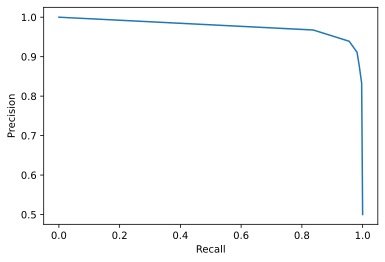

In [108]:
from sklearn.metrics import precision_recall_curve
knn.predict_proba(x_test)  # 1 - pihat, pihat
prob_test = knn.predict_proba(x_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

## K Nearest Neighbors with Grid Search CV

In [80]:
from sklearn.model_selection import GridSearchCV

param_knn = {'n_neighbors': range(1, 26, 1)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(x_train, y_train)
# the best hyperparameter chosen:
print("Best k is:", grid_knn.best_params_)
# When k=25 (best case), the validation score of through CV is:
print("Mean validation score is:", grid_knn.best_score_)

Best k is: {'n_neighbors': 3}
Mean validation score is: 0.9403126599142496


In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)

knn.fit(x_train,y_train)

y_test_pred = knn.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.946351332496163


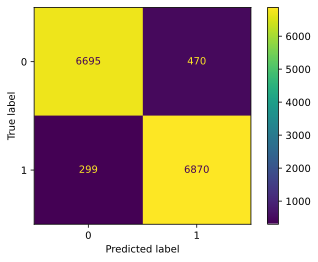

In [82]:
knn_matrix = metrics.confusion_matrix(y_test, y_test_pred)
knn_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

In [84]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.9359673024523161
Recall score: 0.9582926489050076
Accuracy score: 0.946351332496163
F1 score: 0.946998414777035


In [85]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', knn.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-knn.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error =  0.05364866750383703
Mean Square Error MSE =  0.05364866750383703
R-Squared =  0.946351332496163
Adjusted R-Squared =  0.9462838734661198


Text(0, 0.5, 'Precision')

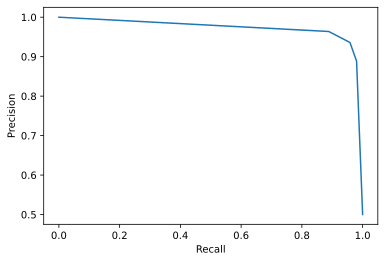

In [86]:
from sklearn.metrics import precision_recall_curve
knn.predict_proba(x_test)  # 1 - pihat, pihat
prob_test = knn.predict_proba(x_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.9598158225198828


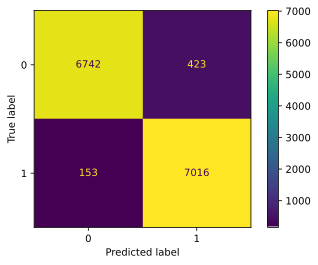

In [84]:
rf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
rf_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

In [85]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', rf.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-rf.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('F1 score:', f1_score(y_test, y_test_pred))

Mean Absolute Error =  0.040184177480117204
Mean Square Error MSE =  0.040184177480117204
R-Squared =  0.9598158225198828
Adjusted R-Squared =  0.9597652940396424
F1 score: 0.9605695509309966


In [86]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

occyp           0.165298
Age_slot        0.106481
income_slot     0.097171
famtp           0.069436
worktm_slot     0.068899
inctp           0.067174
edutp           0.053835
famsize         0.053312
Realty          0.048728
Car             0.043008
Gender          0.037238
phone           0.036907
wkphone         0.033815
houtp           0.030955
ChldNo_0        0.029657
ChldNo_1        0.022890
email           0.021914
ChldNo_2plus    0.013282
dtype: float64

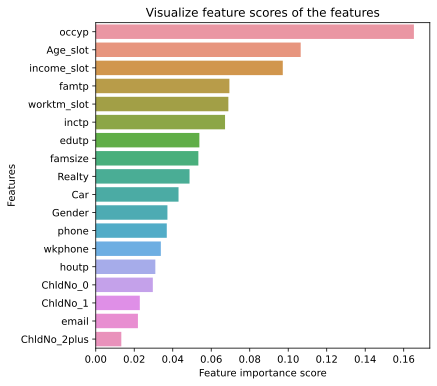

In [97]:
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Random Forest with Grid Search CV

In [88]:
from sklearn.model_selection import GridSearchCV

param_rf = {'n_estimators': range(100, 200, 5)}

#apply grid search
grid_rf = GridSearchCV(rf, param_rf, cv = 5)
grid_rf.fit(x_train, y_train)
# the best hyperparameter chosen:
print("Best n_estimator is:", grid_rf.best_params_)

print("Mean validation score is:", grid_rf.best_score_)

Best n_estimator is: {'n_estimators': 150}
Mean validation score is: 0.9607025147781852


In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150)

rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.9598158225198828


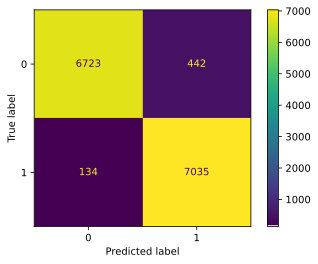

In [90]:
rf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
rf_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

In [98]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', rf.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-rf.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('F1 score:', f1_score(y_test, y_test_pred))
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))

Mean Absolute Error =  0.040184177480117204
Mean Square Error MSE =  0.040184177480117204
R-Squared =  0.9598158225198828
Adjusted R-Squared =  0.9597652940396424
F1 score: 0.9606718557968047
Precision score: 0.9408853818376354
Recall score: 0.9813084112149533
